In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import random
kb = 1.380649e-23 
Na = 6.022e23

3a

In [2]:
def vel_dist(vel, temp, mass):
    mass = (mass/1000)/Na
    beta = 1/(kb*temp)
    term2 = (mass/(2 * np.pi * kb * temp))**(1/2)
    term3 = np.exp(-(beta * mass * vel**2)/2)
    prob = term2 * term3
    
    return prob

In [3]:
velocity = np.arange(-1000, 1000)

In [4]:
vel150 = vel_dist(velocity, 150, 84)
maxpoint = np.max(vel150)

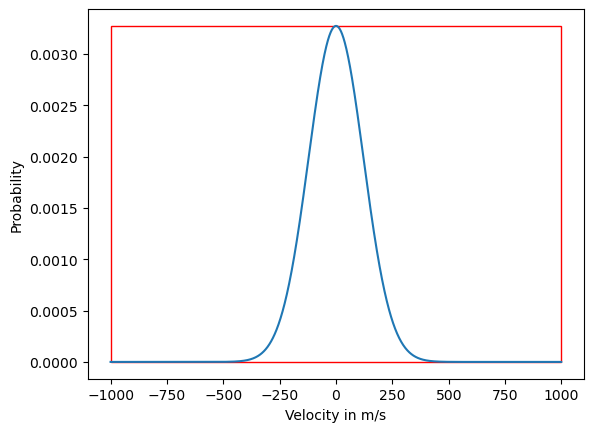

In [5]:
fig, ax = plt.subplots()
ax.plot(velocity, vel150) 
ax.set_ylabel("Probability")
ax.set_xlabel("Velocity in m/s")
rect = patches.Rectangle((-1000,0), 2000, maxpoint, edgecolor = "r" , facecolor = 'none')
ax.add_patch(rect)
plt.show()

3b

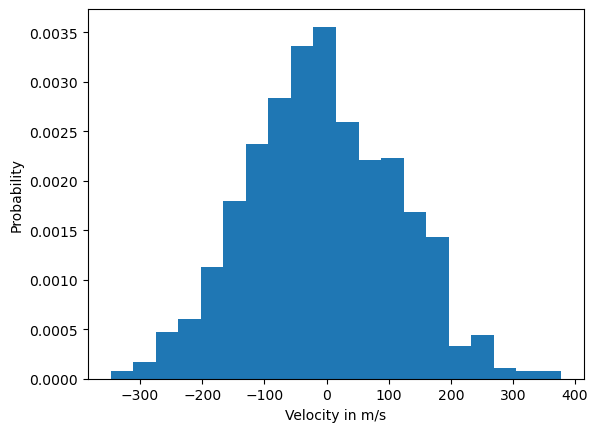

In [8]:
#monte carlo sampling
probability = np.array([])
mass = 84
temp = 150

while True:
    xval = random.uniform(-1000,1000)
    yval = random.uniform(0 , maxpoint)
    if yval <= vel_dist(xval, temp, mass):
        probability = np.append(probability, xval)
    if len(probability) >= 1000:
        break

plt.hist(probability, 20, density = True)
plt.ylabel("Probability")
plt.xlabel("Velocity in m/s")
plt.show()

3c

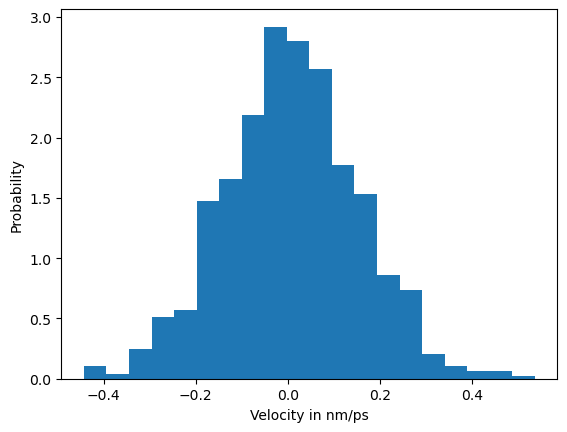

In [9]:
def sample_normal(mass, temp):
    mass = (mass / 1000)/Na
    beta = 1/(kb * temp)
    SD = 3*((1/(2 * np.pi * beta * mass))**0.5)
    vpoint = SD * np.random.randn() 
    vpoint = vpoint*0.001
    return vpoint #nm/ps

probability = np.array([])

while True:
    xval = sample_normal(84, 150)
    probability = np.append(probability, xval)
    if len(probability) >= 1000:
        break

plt.hist(probability, 20, density = True)
plt.ylabel("Probability")
plt.xlabel("Velocity in nm/ps")
plt.show()


3d

In [16]:
def anderson(positions, mass, temp): #position in nm, mass in g/mol, temp in K
    vel_anderson = np.array([])
    for i in range(np.size(positions[0])):
        for j in range(3):
            norm_vel = sample_normal(mass[i], temp)
            vel_anderson = np.append(vel_anderson, norm_vel)
    vel_anderson = np.reshape(vel_anderson, (np.size(positions[0]), 3))
    return vel_anderson # in nm/ps

In [17]:
positionstest = np.zeros((4,3))
massestest = np.ones((4,1)) * 84
testvelmatrix = anderson(positionstest, massestest, 200)
testvelmatrix

array([[-0.14450063, -0.05538201,  0.06181746],
       [ 0.08241525,  0.08701951,  0.22180084],
       [-0.07882886,  0.04997007,  0.05494841]])